<a href="https://colab.research.google.com/github/alisha873/AI-ML/blob/main/level3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#loading necessary packages

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

#loading data


In [2]:
df= pd.read_csv("data.csv")

In [7]:
a = df.copy(deep=True)

<class 'pandas.core.frame.DataFrame'>


#pre processing

In [8]:
y = a.iloc[:, 0].values
X = a.iloc[:, 1:].values

In [9]:
X = X.reshape(-1, 28, 28)

In [10]:
X = X / 255.0

#splitting the data

In [11]:
train_img, test_img, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=42)

#training the model

In [26]:
model=tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(520,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]
)

In [37]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_log = model.fit(train_img, train_label, epochs=5, validation_data=(test_img, test_label))

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9251 - loss: 0.1976 - val_accuracy: 0.8942 - val_loss: 0.3536
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9243 - loss: 0.1992 - val_accuracy: 0.8933 - val_loss: 0.3674
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9262 - loss: 0.1946 - val_accuracy: 0.8976 - val_loss: 0.3587
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9260 - loss: 0.1911 - val_accuracy: 0.8894 - val_loss: 0.3551
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9259 - loss: 0.1932 - val_accuracy: 0.8963 - val_loss: 0.3737


In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 520)                   │         408,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 520)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 10)                    │           5,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,240,232 (4.73 MB)

 Trainable params: 413,410 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 826,822 (3.15 MB)

#testing the model

In [39]:
test_loss, test_accuracy= model.evaluate(test_img,test_label)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8969 - loss: 0.3811


In [40]:
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

Test Accuracy: 0.8963, Test Loss: 0.3737


#visual reps

In [41]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

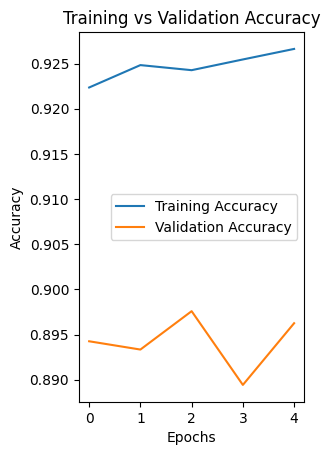

In [42]:
plt.subplot(1, 2, 1)
plt.plot(training_log.history['accuracy'], label='Training Accuracy')
plt.plot(training_log.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')


plt.show()

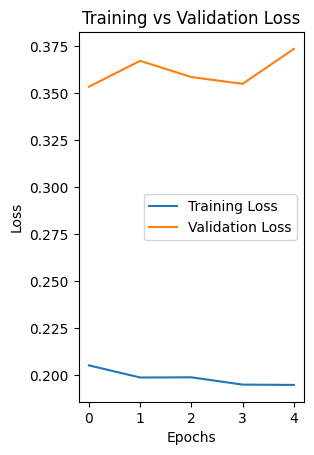

In [43]:
plt.subplot(1, 2, 2)
plt.plot(training_log.history['loss'], label='Training Loss')
plt.plot(training_log.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()